In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'C:\Users\Admin\Desktop\Python\Machine Learning\Project\LaptopPrice_data.xlsx')
df

,Sr,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1297,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,Intel Core i7,0,128,Intel,Windows
1298,1298,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,Intel Core i7,0,512,Intel,Windows
1299,1299,Lenovo,Notebook,2,1.50,12201.1200,0,0,Other Intel Processor,0,0,Intel,Windows
1300,1300,HP,Notebook,6,2.19,40705.9200,0,0,Intel Core i7,1000,0,AMD,Windows


In [3]:
df.shape

(1302, 13)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Sr             0
Company        0
TypeName       0
Ram            0
Weight         0
Price          0
Touchscreen    0
Ips            0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
os             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sr           1302 non-null   int64  
 1   Company      1302 non-null   object 
 2   TypeName     1302 non-null   object 
 3   Ram          1302 non-null   int64  
 4   Weight       1302 non-null   float64
 5   Price        1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   Ips          1302 non-null   int64  
 8   Cpu brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 132.4+ KB


In [7]:
df.columns

Index(['Sr', 'Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen',
       'Ips', 'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [8]:
df.describe()

,Sr,Ram,Weight,Price,Touchscreen,Ips,HDD,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000
mean,650.500000,8.385561,2.039416,59889.058673,0.146697,0.27957,414.101382,183.874040
std,375.999335,5.085166,0.665274,37251.183866,0.353940,0.44896,515.889348,186.969314
min,0.000000,2.000000,0.690000,9270.720000,0.000000,0.00000,0.000000,0.000000
25%,325.250000,4.000000,1.500000,31914.720000,0.000000,0.00000,0.000000,0.000000
50%,650.500000,8.000000,2.040000,52107.840000,0.000000,0.00000,0.000000,256.000000
75%,975.750000,8.000000,2.300000,79303.816800,0.000000,1.00000,1000.000000,256.000000
max,1301.000000,64.000000,4.700000,324954.720000,1.000000,1.00000,2000.000000,1024.000000


In [9]:
df.describe(include='object')

,Company,TypeName,Cpu brand,Gpu brand,os
count,1302,1302,1302,1302,1302
unique,19,6,5,3,3
top,Dell,Notebook,Intel Core i7,Intel,Windows
freq,297,727,527,722,1125


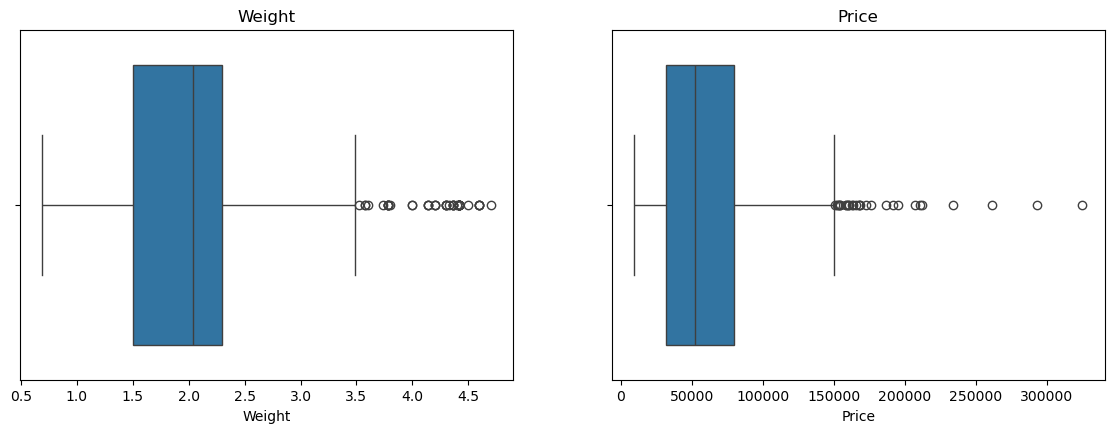

In [10]:
plt.figure(figsize=(14, 10))

plt.subplot(2,2,1)
plt.title('Weight')
sns.boxplot(data = df, x = 'Weight')

plt.subplot(2,2,2)
plt.title('Price')
sns.boxplot(data = df, x = 'Price')


plt.show()

<h3>There is outlier which is need to be removed<h3/>

In [11]:
df.describe(include='object').columns

Index(['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os'], dtype='object')

In [12]:
for i in df.describe(include='object').columns:
    print(i)

Company
TypeName
Cpu brand
Gpu brand
os


In [13]:
for i in df.describe(include='object').columns:
    va = df[i].value_counts()
    print(va)
    print('--------------------------------')

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
--------------------------------
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: count, dtype: int64
--------------------------------
Cpu brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             62
Name: count, dtype: int64
--------------------------------
Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64
--------------------------------
os
Windows               1125
Others/No OS/Linux     156
Mac 

In [14]:
for i in df.describe(include='object').columns:
    va = df[i].value_counts()
    print(va)
    print('--------------------------------')

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
--------------------------------
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: count, dtype: int64
--------------------------------
Cpu brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             62
Name: count, dtype: int64
--------------------------------
Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64
--------------------------------
os
Windows               1125
Others/No OS/Linux     156
Mac 

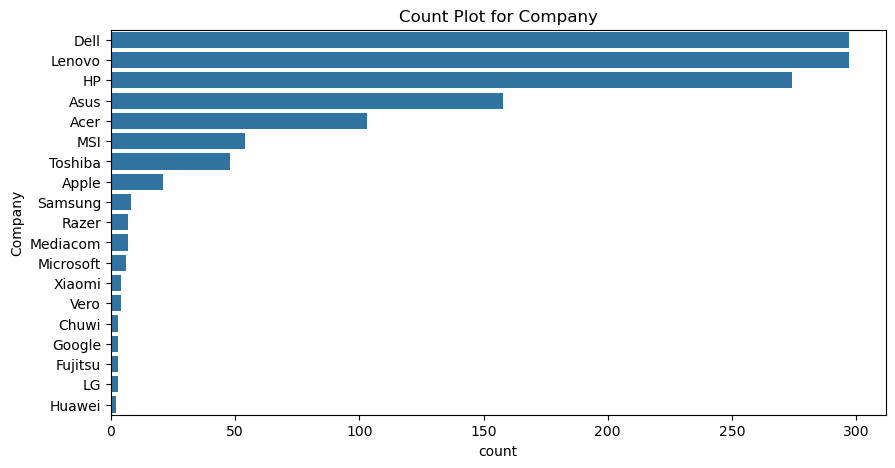

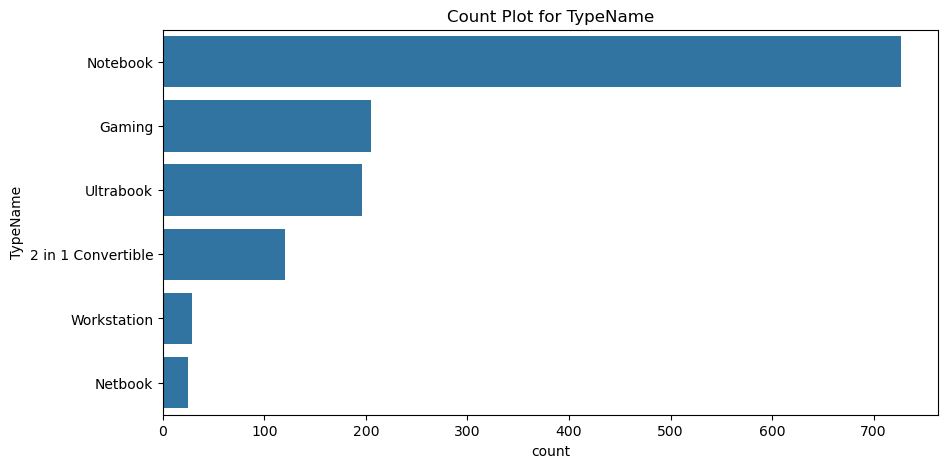

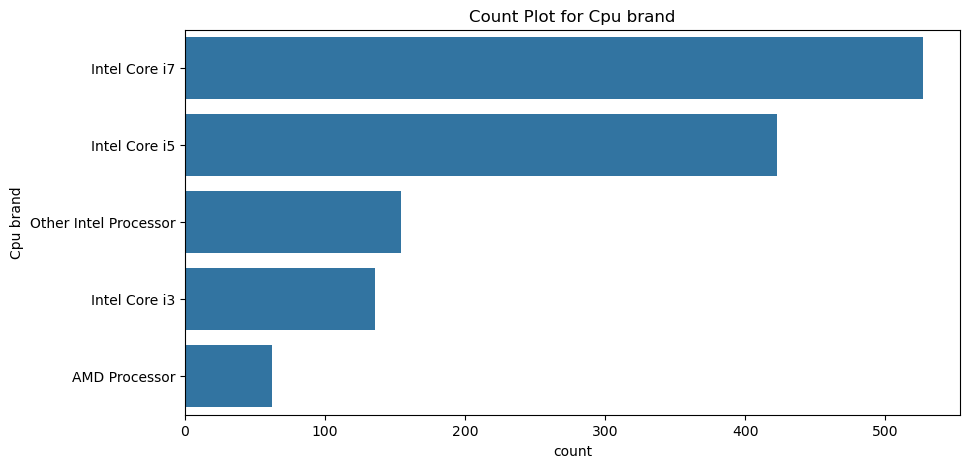

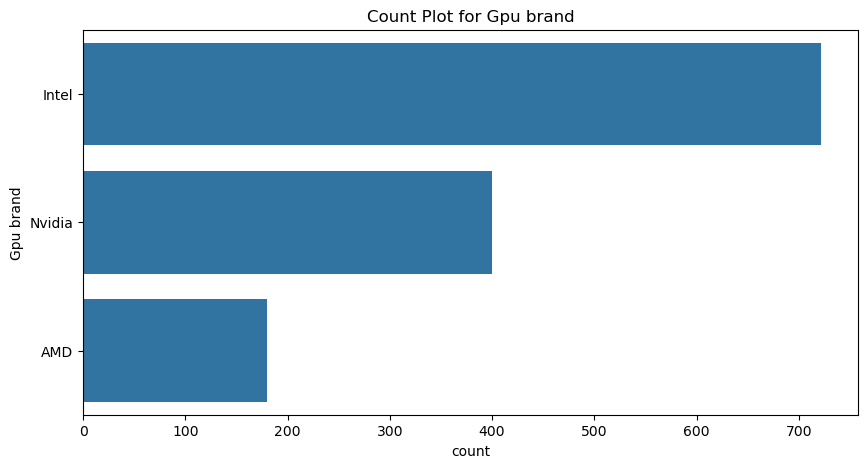

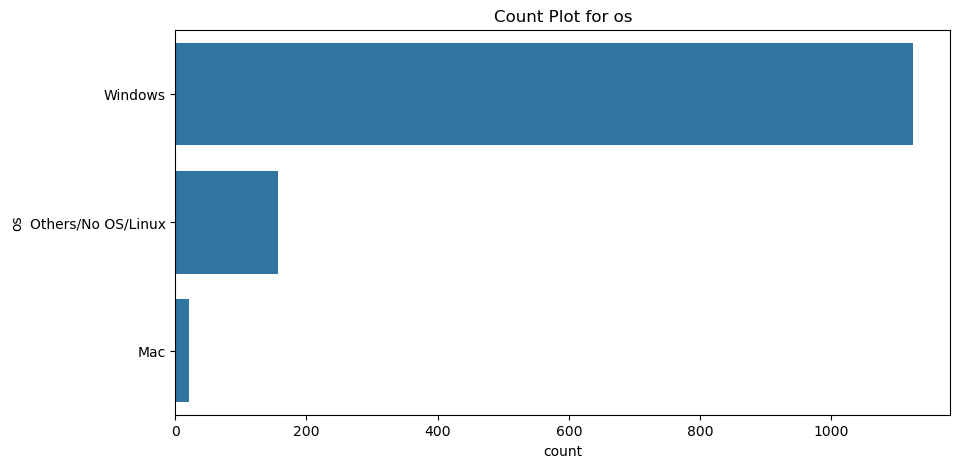

In [15]:
for i in df.describe(include='object').columns:
    plt.figure(figsize=(10,5))
    plt.title(f'Count Plot for {i}')
    order = df[i].value_counts().index
    sns.countplot(data = df, y = i, order = order)
    plt.show()

In [16]:
df.head()

,Sr,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


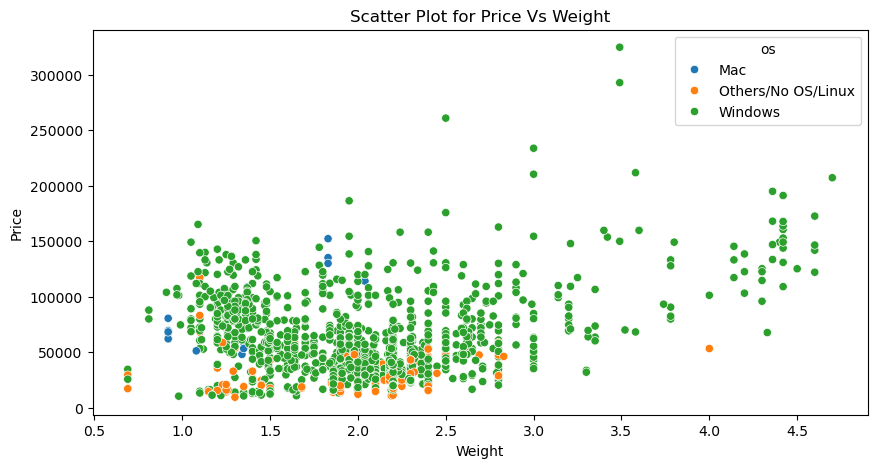

In [17]:
plt.figure(figsize=(10,5))
plt.title('Scatter Plot for Price Vs Weight')
sns.scatterplot(data = df, x = 'Weight', y = 'Price', hue = 'os')
plt.show()

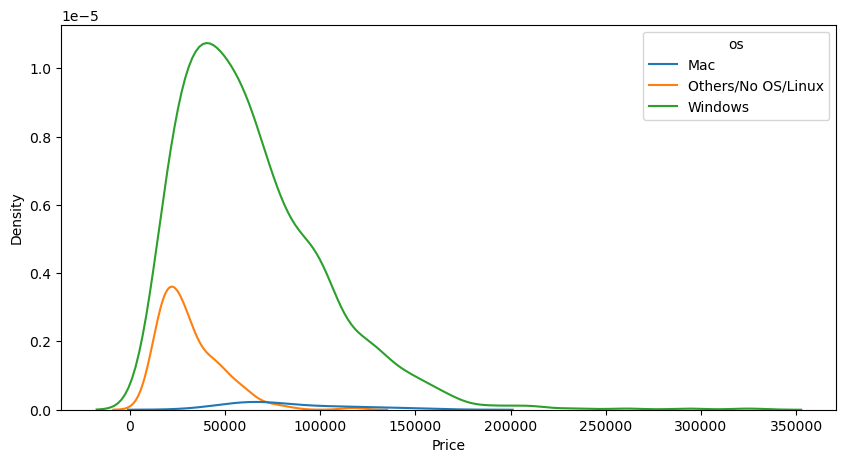

In [18]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = df, x = 'Price', hue = 'os')
plt.show()

<h3>Removing Outlier<h3/>

In [19]:
df.describe()

,Sr,Ram,Weight,Price,Touchscreen,Ips,HDD,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000
mean,650.500000,8.385561,2.039416,59889.058673,0.146697,0.27957,414.101382,183.874040
std,375.999335,5.085166,0.665274,37251.183866,0.353940,0.44896,515.889348,186.969314
min,0.000000,2.000000,0.690000,9270.720000,0.000000,0.00000,0.000000,0.000000
25%,325.250000,4.000000,1.500000,31914.720000,0.000000,0.00000,0.000000,0.000000
50%,650.500000,8.000000,2.040000,52107.840000,0.000000,0.00000,0.000000,256.000000
75%,975.750000,8.000000,2.300000,79303.816800,0.000000,1.00000,1000.000000,256.000000
max,1301.000000,64.000000,4.700000,324954.720000,1.000000,1.00000,2000.000000,1024.000000


In [20]:
columns = ['Price', 'Weight']

for col in columns:
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # Filter non-outliers only and update df
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    df

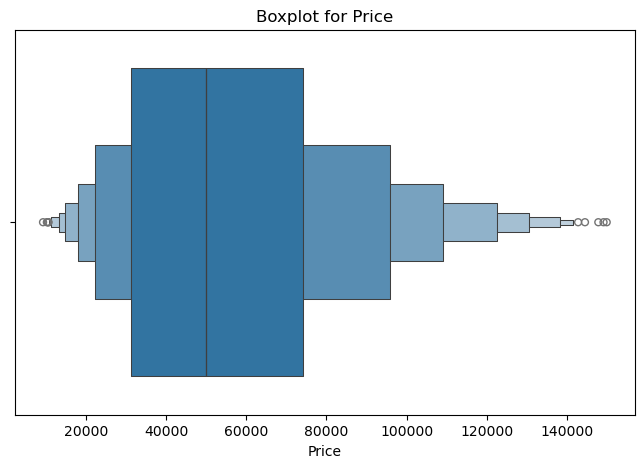

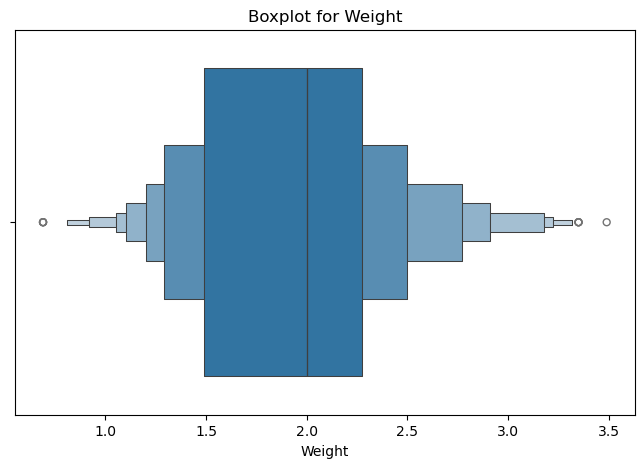

In [21]:
for i in columns:
    plt.figure(figsize=(8, 5))
    plt.title(f'Boxplot for {i}')
    sns.boxenplot(x = df[i])
    plt.show()

In [22]:
df.head()

,Sr,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


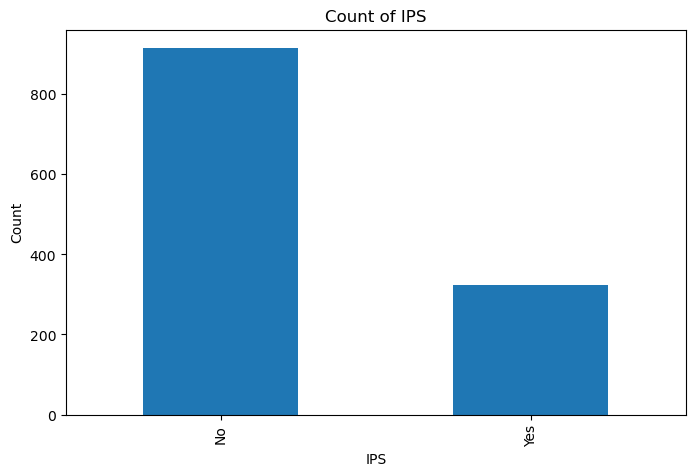

In [23]:
plt.figure(figsize=(8, 5))
plt.title('Count of IPS')
df['Ips'].value_counts().rename(index = {0:'No', 1:'Yes'}).plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('IPS')
plt.show()

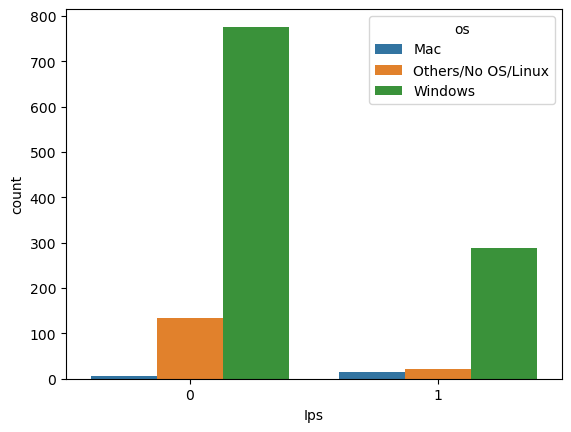

In [24]:
sns.countplot(data = df, x = 'Ips', hue = 'os')
plt.show()

In [25]:
df = df.drop('Sr', axis=1)
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,Intel Core i7,0,128,Intel,Windows
1298,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,Intel Core i7,0,512,Intel,Windows
1299,Lenovo,Notebook,2,1.50,12201.1200,0,0,Other Intel Processor,0,0,Intel,Windows
1300,HP,Notebook,6,2.19,40705.9200,0,0,Intel Core i7,1000,0,AMD,Windows


In [26]:
df['Cpu brand'].value_counts()

Cpu brand
Intel Core i7            468
Intel Core i5            423
Other Intel Processor    150
Intel Core i3            136
AMD Processor             62
Name: count, dtype: int64

In [27]:
df.groupby(['Company','TypeName','Cpu brand','Ram'])[['Price']].mean().sort_values(by = 'Price', ascending  = False)[:10]

,,,,Price
Company,TypeName,Cpu brand,Ram,
Toshiba,Ultrabook,Intel Core i7,32,149130.7200
Dell,Notebook,Intel Core i7,32,140605.9200
Razer,Gaming,Intel Core i7,16,138474.7200
Microsoft,Ultrabook,Intel Core i7,16,137941.9200
HP,Workstation,Intel Core i7,16,128884.3200
Lenovo,Ultrabook,Intel Core i7,24,126912.9600
Apple,Ultrabook,Intel Core i7,16,126404.8464
Lenovo,Ultrabook,Intel Core i7,16,120103.7760
Google,Ultrabook,Intel Core i7,16,117162.7200


<Axes: >

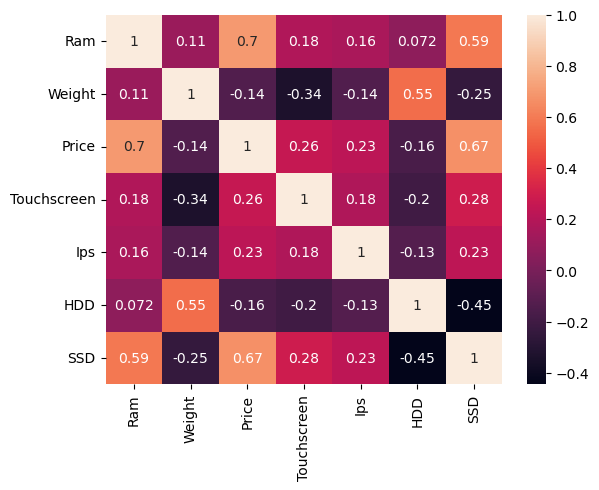

In [28]:
corr = df[df.describe().columns].corr()
sns.heatmap(corr, annot=True)

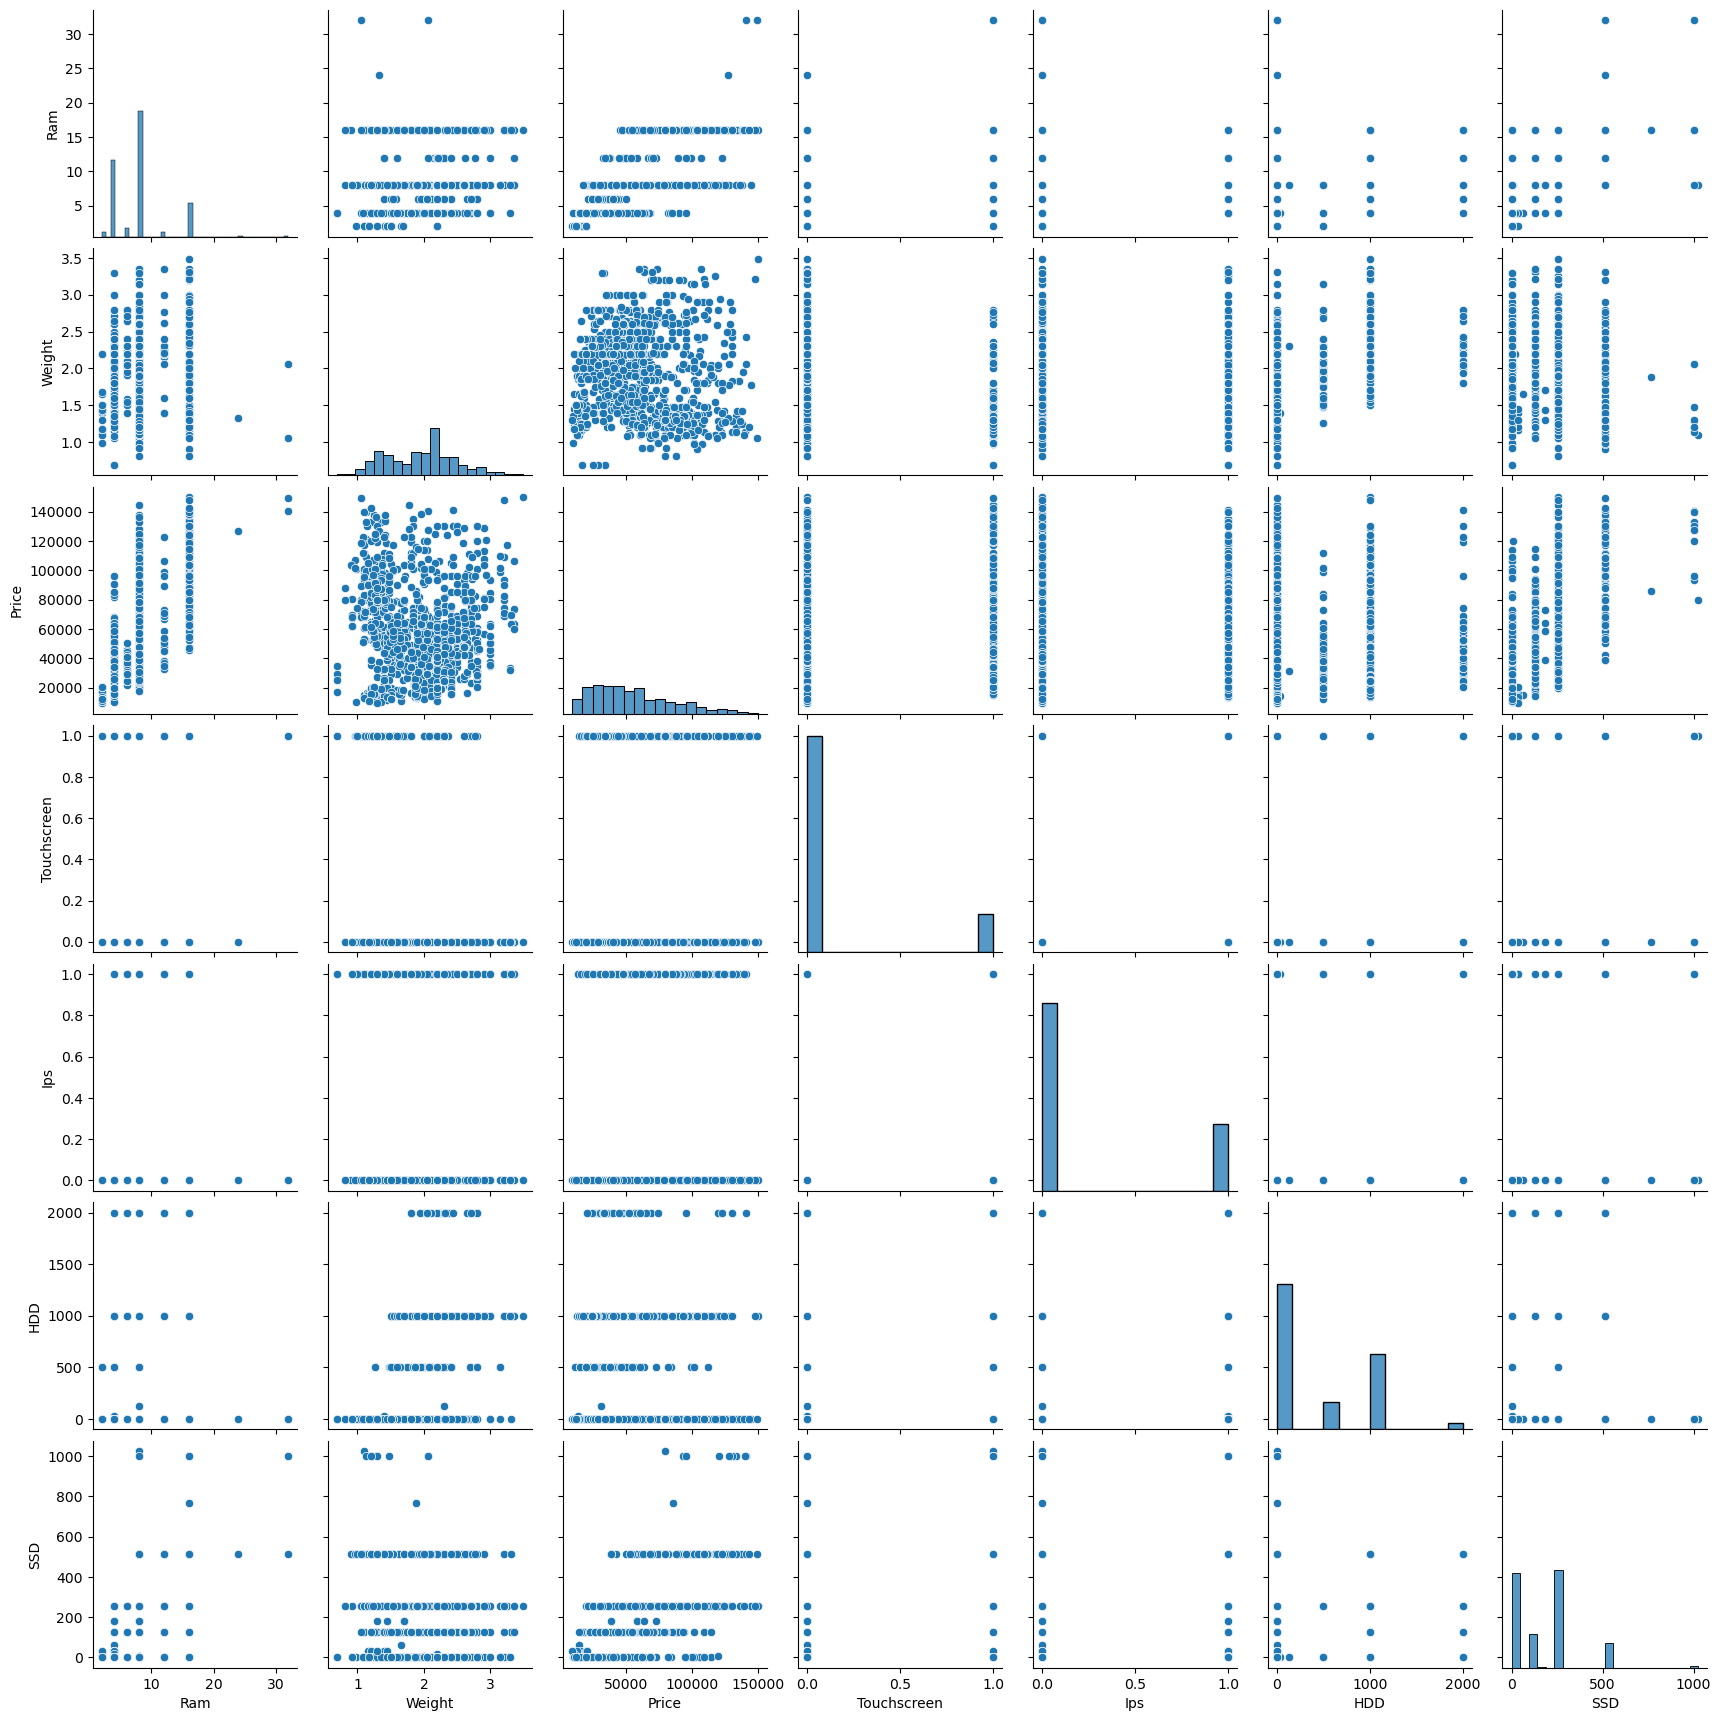

In [29]:
sns.pairplot(df)

In [30]:
X = df.drop('Price', axis=1)
y = df['Price']
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(1239, 11)
(1239,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(929, 11)
(310, 11)
(929,)
(310,)


In [32]:
df.describe(include='object')

,Company,TypeName,Cpu brand,Gpu brand,os
count,1239,1239,1239,1239,1239
unique,19,6,5,3,3
top,Lenovo,Notebook,Intel Core i7,Intel,Windows
freq,288,723,468,720,1064


In [33]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [34]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [35]:
for i, col in enumerate(X_train.columns):
    print(f'{i}:{col}')

0:Company
1:TypeName
2:Ram
3:Weight
4:Touchscreen
5:Ips
6:Cpu brand
7:HDD
8:SSD
9:Gpu brand
10:os


In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, SVR

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def score(y_tes, y_pre):
    print('MSE', mean_squared_error(y_tes, y_pre))
    print('MAE', mean_absolute_error(y_tes, y_pre))
    print('R2_score', r2_score(y_tes, y_pre))

<h1> LinearRegression<h1/>

In [39]:
step1 = ColumnTransformer(
    transformers= [
        ('encoder', OneHotEncoder(drop='first', sparse_output=False),[0,1,6,9,10])
         ],
    remainder = 'passthrough'
)
step2 = LinearRegression()
pipe_lr = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

In [40]:
score(y_test, y_pred)

MSE 181720071.41457987
MAE 10249.135022213808
R2_score 0.7707032984377378


<h1>SVM<h1/>

In [41]:
step1 = ColumnTransformer(
    transformers= [
        ('encoder', OneHotEncoder(drop='first', sparse_output=False),[0,1,6,9,10])
         ],
    remainder = 'passthrough'
)
step2 = SVR(kernel='linear')
pipe_svr = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe_svr.fit(X_train, y_train)
y_pred_svm = pipe_svr.predict(X_test)

In [42]:
score(y_test, y_pred_svm)

MSE 462285799.02833116
MAE 15756.539694250712
R2_score 0.41668188840604614


<h1>RandomForestRegressor<h1/>

In [59]:
step1 = ColumnTransformer(
    transformers= [
        ('encoder', OneHotEncoder(drop='first', sparse_output=False),[0,1,6,9,10])
         ],
    remainder = 'passthrough'
)
step2 = RandomForestRegressor(n_estimators=200, min_samples_split=5, random_state=10)
pipe_rm = Pipeline([
    ('step1', step1),
    ('step2', step2)
])x
pipe_rm.fit(X_train, y_train)
y_pred_rm = pipe_rm.predict(X_test)

In [60]:
score(y_test, y_pred_rm)

MSE 150119915.2122182
MAE 8489.272547336068
R2_score 0.8105767781785808


<h1>KNeighborsRegressor<h1/>

In [45]:
step1 = ColumnTransformer(
    transformers= [
        ('encoder', OneHotEncoder(drop='first', sparse_output=False),[0,1,6,9,10])
         ],
    remainder = 'passthrough'
)
step2 = KNeighborsRegressor()
pipe_kn = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe_kn.fit(X_train, y_train)
y_pred_kn = pipe_kn.predict(X_test)

In [46]:
r2_score(y_test, y_pred_kn)

0.6828167631215134

<h1>AdaBoostRegressor<h1/>

In [47]:
step1 = ColumnTransformer(
    transformers= [
        ('encoder', OneHotEncoder(drop='first', sparse_output=False),[0,1,6,9,10])
         ],
    remainder = 'passthrough'
)
step2 = AdaBoostRegressor()
pipe_ad = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe_ad.fit(X_train, y_train)
y_pred_ad = pipe_ad.predict(X_test)

In [48]:
score(y_test, y_pred_ad)

MSE 251099869.56327486
MAE 13009.115163176288
R2_score 0.6831589851061786


<h1>DecisionTreeRegressor<h1/>

In [49]:
step1 = ColumnTransformer(
    transformers= [
        ('encoder', OneHotEncoder(drop='first', sparse_output=False),[0,1,6,9,10])
         ],
    remainder = 'passthrough'
)
step2 = DecisionTreeRegressor()
pipe_dt = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe_dt.fit(X_train, y_train)
y_pred_dt = pipe_dt.predict(X_test)

In [50]:
score(y_test, y_pred_dt)

MSE 252316439.8358507
MAE 10465.73425548387
R2_score 0.6816239012348767


<h4>All the models are tested, Random Forest Algorithm giving max R2_score<h4/>

## Saving the model

In [61]:
import pickle

In [ ]:
pickle.dump(pipe_rf,open('rf.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))

In [72]:
df['SSD'].value_counts().sort_values().unique()

array([  1,   3,   5,   6,   8, 121, 163, 454, 475], dtype=int64)